# <center>День 2. Линейные и метрические модели классификации
## <center>Logit и  KNN

<center>  <img src='../img/nobody expects logit.jpg' width=60%>

### <center>  Линейный классификатор


<center> <img src="../img/logit.png">

Если  обозначим "+1" метки целевого класса (положительные примеры) и "-1" (отрицательные примеры). <br>
Один из самых простых классификаторов: 
$$\Large y(\textbf{x}) = \text{sign}(\textbf{w}^{\text{T}}\textbf x),$$

где
 - $\textbf{x}$ – вектор признаков примера (вместе с единицей);
 - $\textbf{w}$ – веса в линейной модели (вместе со смещением $w_0$);
 - $\text{sign}(\bullet)$ – функция "сигнум", возвращающая знак своего аргумента;
 - $y(\textbf{x})$ – ответ классификатора на примере $\textbf{x}$.

## <center> Логистическая регрессия

<center>  <img src='../img/ifflogit.jpg' width=30%>

<center> Логистическая регрессия обладает хорошим "умением" – прогнозировать вероятность
$$\Large p_+ = \text P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

<center> Хотим оценивать $p_+ \in [0,1]$, от OLS: $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$. <br>
 $$f: \mathbb{R} \rightarrow [0,1]$$ <br> 
 $$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$ <br>
  <center> где $z = \textbf{w}^\text{T} \textbf{x}$

# Нарисуем график Сигмоиды

In [1]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
plt.style.use('seaborn')

In [3]:
sigmoid = lambda x:  1. / (1 + np.exp(-x))

In [4]:
x_array = np.linspace(-10, 10, 1000)
y_array = sigmoid(x_array)

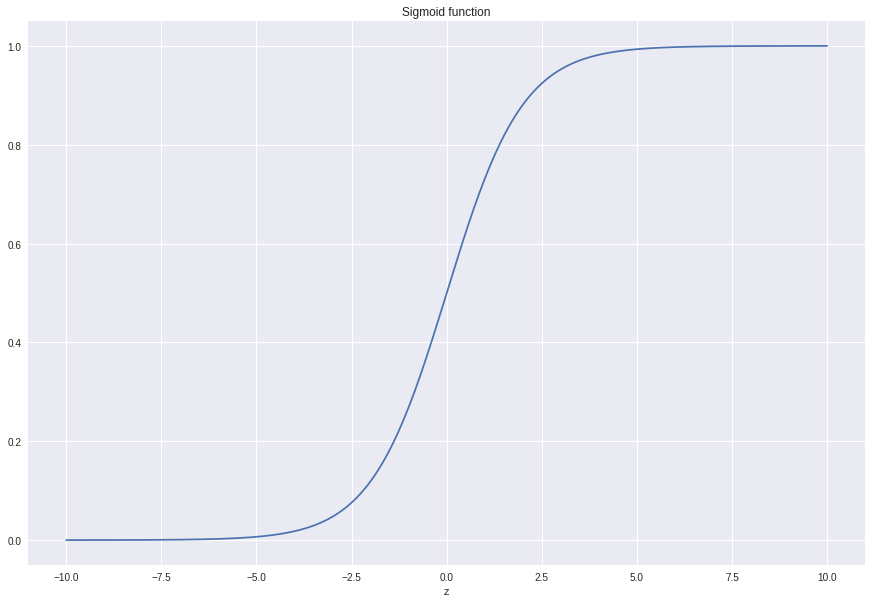

In [5]:
fig = plt.figure(figsize=(15, 10))
plt.plot(x_array, y_array);
plt.xlabel('z');
plt.title('Sigmoid function');

### Maximum Likelihood Estimation

Теперь посмотрим, как из принципа максимального правдоподобия получается оптимизационная задача, которую решает логистическая регрессия, а именно, – минимизация *логистической* функции потерь. 
Вероятность отнесения примера к классу "+" как 

$$\Large p_+(\textbf{x}_\text{i}) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Тогда для класса "-" аналогичная вероятность:
$$\Large p_-(\textbf{x}_\text{i})  = \text{P}\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sigma(-\textbf{w}^\text{T}\textbf{x}_\text{i}) $$

Оба этих выражения можно объединить в одно:

$$\Large \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})$$

$$\Large X_i \textbf{~} iid$$

$$\Large \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \prod_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

где $\ell$ – длина выборки $\textbf X$ (число строк).

Как водится, возьмем логарифм данного выражения (сумму оптимизировать намного проще, чем произведение):

$$\Large  \log \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \log \sum_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i})   = $$

$$\Large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})$$

То есть в данном случае принцип максимизации правдоподобия приводит к минимизации выражения 

$$\Large \mathcal{L_{log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}).$$

<center> *logloss* - $L(M) = \log (1 + \exp^{-M})$.
<center> *zero-one loss* - $L_{1/0}(M) = [M < 0]$.

<center> <img src = '../img/logloss_margin.png' width=70%>

### L2-регуляризация логистической функции потерь

$$\Large J(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

В случае логистической регрессии принято введение обратного коэффициента регуляризации $C = \frac{1}{\lambda}$. И тогда решением задачи будет

$$\Large \widehat{\textbf{w}}  = \arg \min_{\textbf{w}} J(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 


In [6]:
from sklearn.datasets import make_blobs

In [7]:
X, y = make_blobs(400, centers=2, cluster_std=2, random_state=123)

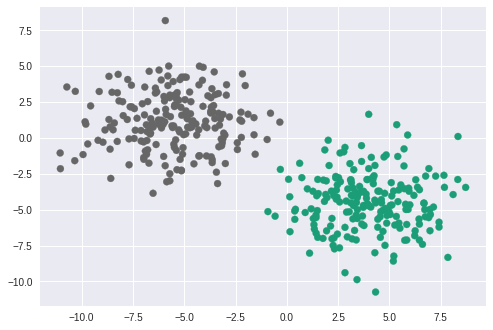

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2');

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logit = LogisticRegression()

In [11]:
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
logit.coef_

array([[-1.68946388,  1.00095754]])

In [13]:
logit.intercept_

array([ 0.23408669])

In [14]:
line = lambda x: (-x * coef[0] - intercept) / coef[1]

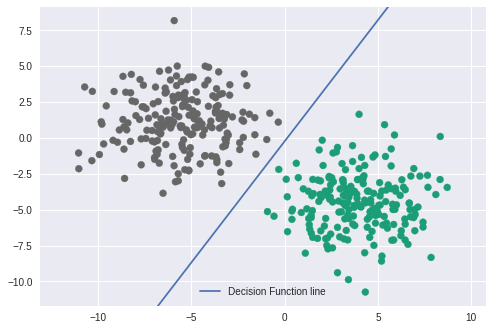

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2');
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = logit.coef_[0]
intercept = logit.intercept_
plt.plot([xmin, xmax], [line(xmin), line(xmax)], label='Decision Function line')
plt.legend(loc='best')
plt.ylim(ymin, ymax);

### MNIST digits

In [16]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [20]:
digits = load_digits()

In [21]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [22]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [23]:
X, y = digits.data, digits.target

In [24]:
params = {'C': np.linspace(0.01, 10, 20), 'penalty': ['l1', 'l2']}

In [25]:
logit = LogisticRegression()
scaler = StandardScaler()
grid = GridSearchCV(logit, param_grid=params, n_jobs=-1)

In [26]:
pipeline_grid = make_pipeline(scaler, grid)

In [28]:
%%time
pipeline_grid.fit(X, y)

CPU times: user 553 ms, sys: 28.9 ms, total: 582 ms
Wall time: 16.9 s


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gridsearchcv', GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))])

In [29]:
pipeline_grid.steps[1][1].best_params_['C']

0.53578947368421059

In [30]:
pipeline_grid.steps[1][1].best_score_

0.9326655537006121

In [31]:
coef = pipeline_grid.steps[1][1].best_estimator_.coef_[0].ravel()

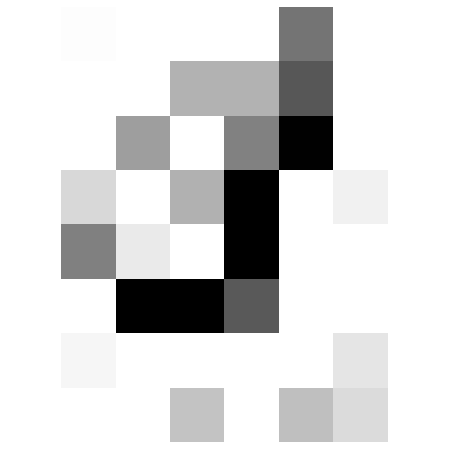

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(np.abs(coef.reshape(8, 8)), interpolation='nearest',
               cmap='binary', vmax=1, vmin=0)
ax.set_xticks(())
ax.set_yticks(());

# <center> KNN or K-Nearest Neighbors

# <center> Самый Простой Алгоритм

<center> <img src = '../img/knn.png'>

<center> **KNN decision line**
<center><img src = '../img/kNN.png' width=50%>

# <center> Проклятие Размерности

<center> <img src = '../img/homer-doh.jpg' width=40%>

<center> <img src = '../img/Curse+of+Dimensionality.jpg' width=50%>

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_data = load_iris()

In [6]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
X, y  = iris_data['data'], iris_data['target']

In [17]:
df = pd.DataFrame(X, columns=iris_data['feature_names'])

In [29]:
hash_map = dict(zip(range(3), iris_data['target_names']))

In [31]:
df['target'] = df.assign(target = y).target.map(hash_map)

In [34]:
sns.set()

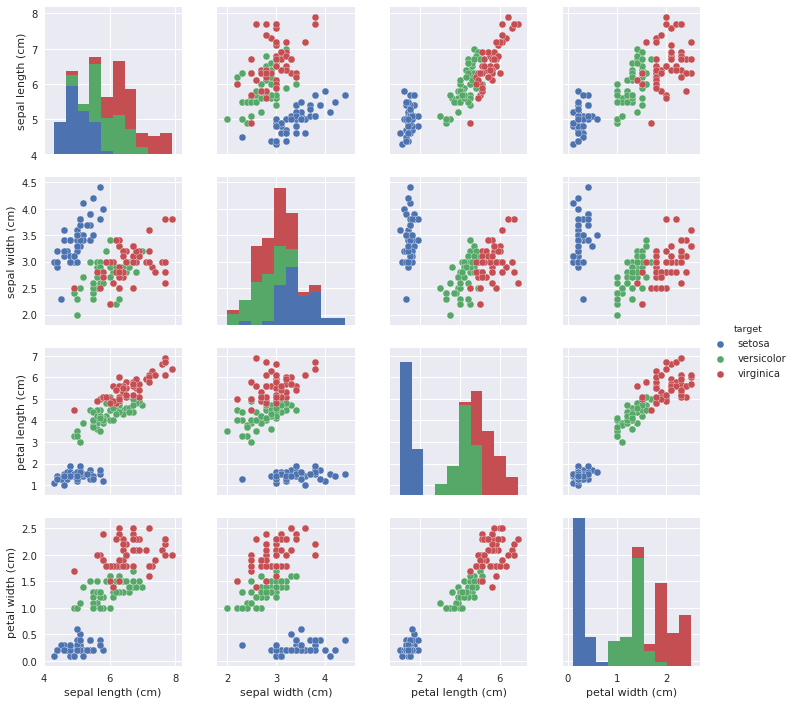

In [35]:
sns.pairplot(df, hue='target');

In [11]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

In [36]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [37]:
knn.score(X, y)

1.0

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [41]:
knn.score(X_test, y_test)

0.97777777777777775

# <center> Мультиклассовая классификация

<center> <img src = '../img/one_class vs multi_class.png' width=50%>